## Ch4_2 Convolutional Neural Network 실습

#### 이미지 처리 (Image Processing) 실습
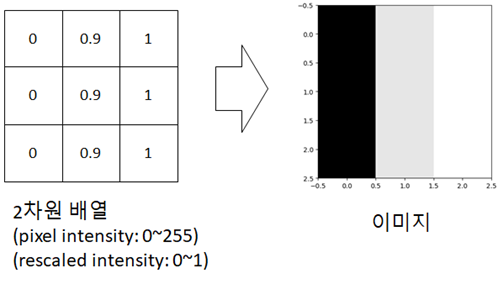

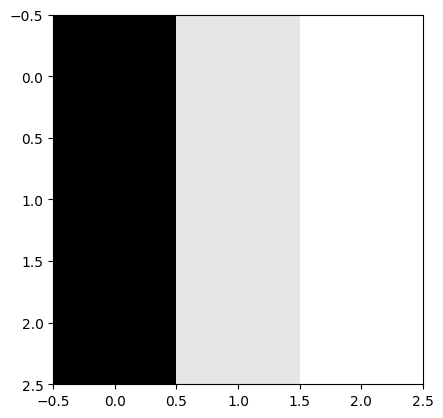

In [1]:
## Image 생성

import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt

# 이미지 생성
image = tf.constant([[[[0], [0.9], [1]],
                      [[0], [0.9], [1]],
                      [[0], [0.9], [1]]]], dtype=np.float32)
# 이미지 출력
plt.imshow(image.numpy().reshape(3,3), cmap='gray')
plt.show()


### Convolution 실습
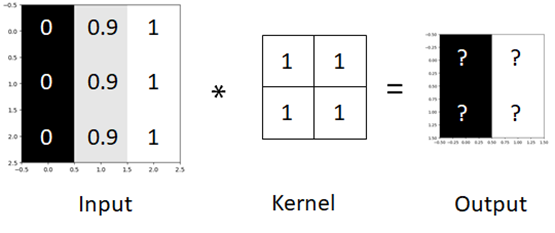

image.shape (1, 3, 3, 1)
conv2d.shape (1, 2, 2, 1)


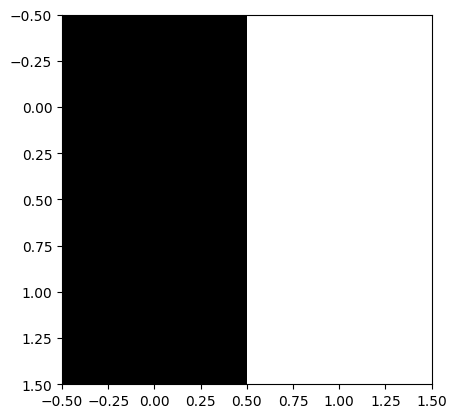

In [12]:
# 가중치 정의
print("image.shape", image.shape)
weight = np.array([[[[1.]], [[1.]]], 
                   [[[1.]], [[1.]]]])
# 가중치 형태 출력
weight_init = tf.constant_initializer(weight)

# 컨볼루션 실행

conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', kernel_initializer=weight_init)(image)
### strides = (1,1)
### padding = 'valid
print("conv2d.shape", conv2d.shape)
# 컨볼루션 결과 형태 출력

# 결과 출력
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()


### Convolution을 이용한 Feature extraction: Edge detection

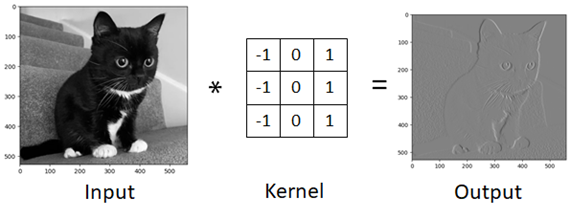

(528, 559)


C:\Users\park\AppData\Local\Temp\ipykernel_41076\3514812593.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('cat.jpg')


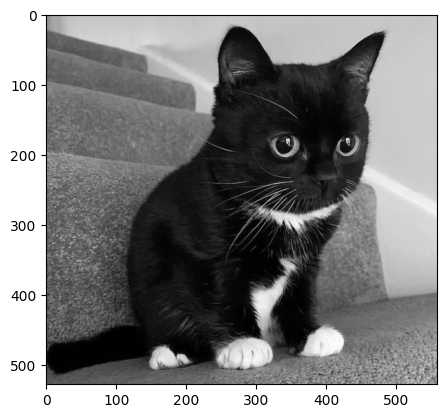

conv2d.shape (1, 528, 559, 1)


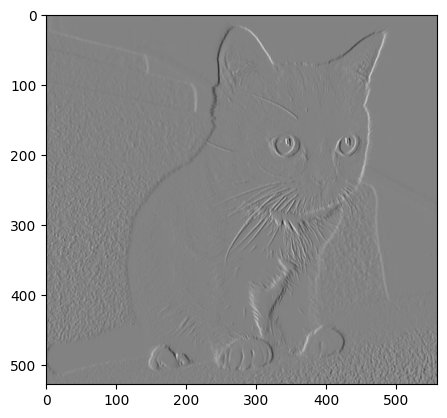

In [3]:
import numpy as np
from imageio import imread, imsave
from skimage import color
import matplotlib.pyplot as plt

img = imread('cat.jpg')
img_gray = color.rgb2gray(img)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')
plt.show()
# 가중치 정의
weight = np.array([[[[-1.]], [[0.]], [[1.]]], 
                   [[[-1.]], [[0.]] , [[1.]]], 
                   [[[-1.]], [[0.]] , [[1.]]]])
weight_init = tf.constant_initializer(weight)

# 컨볼루션 실행
img_gray2 =np.reshape(img_gray, (1,*img_gray.shape,1))
conv2d = keras.layers.Conv2D(filters=1, kernel_size=3, padding='same', kernel_initializer=weight_init)(img_gray2)
print("conv2d.shape", conv2d.shape)

# 결과 출력
plt.imshow(conv2d.numpy().reshape(img_gray.shape), cmap='gray')
plt.show()



In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정
learning_rate = 0.001
training_epochs = 5
batch_size = 100

tf.random.set_seed(0)

# MNIST 데이터셋 로드
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 이미지 정규화: [0, 1] 범위
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# 이미지 차원 확장 (모델에 맞추기 위해)  --> tensorflow input (batch_size * width * height * channel (RGB (3) or gray (1)))
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# 레이블을 원-핫 인코딩 벡터로 변환
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

# 데이터셋의 형태 출력
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)



(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


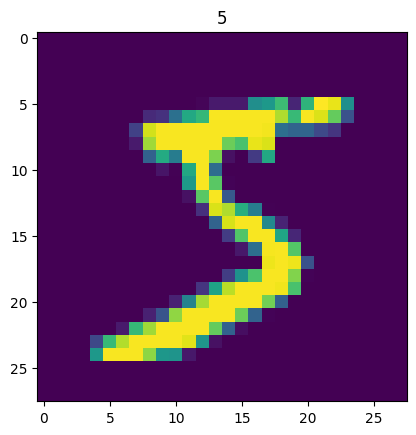

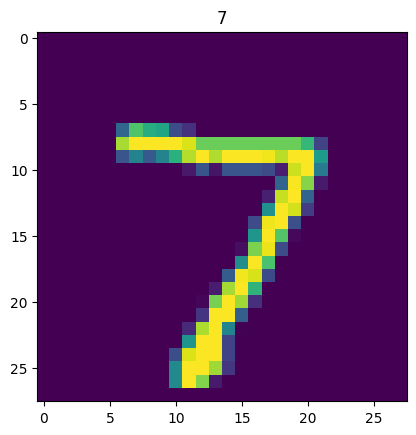

In [10]:
# 트레이닝 세트의 첫 번째 이미지 시각화
plt.imshow(train_images[0])
plt.title(str(np.argmax(train_labels[0])))
plt.show()

# 테스트 세트의 첫 번째 이미지 시각화
plt.imshow(test_images[0])
plt.title(str(np.argmax(test_labels[0])))
plt.show()

In [6]:
model = keras.Sequential()
# 첫 번째 합성곱 레이어
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', input_shape=(28, 28, 1 ), kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.MaxPool2D(padding='SAME'))
# 두 번째 합성곱 레이어
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.MaxPool2D(padding='SAME'))
# 세 번째 합성곱 레이어
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='SAME', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.MaxPool2D(padding='SAME'))
# Flatten -> Fully connected network
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, kernel_initializer='he_uniform')) # 10개 클래스에 대한 출력 레이어
model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))
model.summary() # 모델 요약 출력



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        2

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(), metrics = [tf.keras.metrics.CategoricalAccuracy()])
model.fit(train_images,train_labels,epochs = training_epochs,batch_size = batch_size)

# 모델 훈련 시작
print('Learning Finished!')
m = tf.keras.metrics.CategoricalAccuracy()
m.reset_state()
m.update_state(train_labels, model.predict(train_images))
print("Test accuracy: {:5.4f}".format(m.result().numpy()))
m.reset_state()
m.update_state(test_labels, model.predict(test_images))
print("Test accuracy: {:5.4f}".format(m.result().numpy()))



Epoch 1/5
600/600 [==============================] - 32s 51ms/step - loss: 0.1080 - categorical_accuracy: 0.9677
Epoch 2/5
600/600 [==============================] - 30s 51ms/step - loss: 0.0388 - categorical_accuracy: 0.9885
Epoch 3/5
600/600 [==============================] - 30s 51ms/step - loss: 0.0277 - categorical_accuracy: 0.9912
Epoch 4/5
600/600 [==============================] - 31s 51ms/step - loss: 0.0220 - categorical_accuracy: 0.9931
Epoch 5/5
600/600 [==============================] - 31s 51ms/step - loss: 0.0170 - categorical_accuracy: 0.9947
Learning Finished!
1875/1875 [==============================] - 11s 6ms/step
Test accuracy: 0.9936
313/313 [==============================] - 2s 6ms/step
Test accuracy: 0.9868


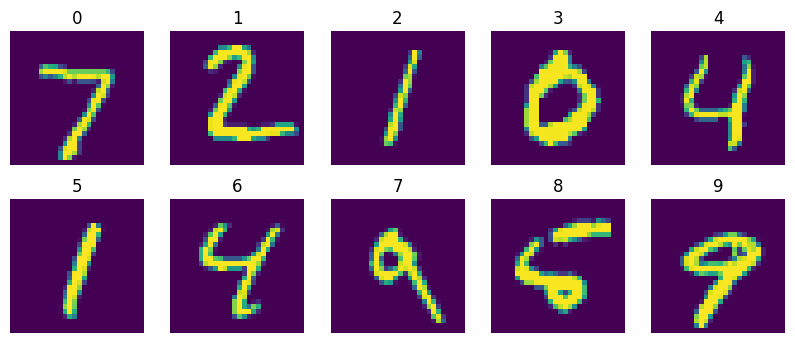

One_hot encoded Y : tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(10, 10), dtype=float32)
Y label : [7 2 1 0 4 1 4 9 5 9]
1/1 [==============================] - 0s 18ms/step
Softmax Pred. Y : [[5.29399129e-11 1.08404969e-07 1.83289295e-08 1.57313913e-08
  8.35924663e-09 5.06446329e-10 1.17812834e-11 9.99999762e-01
  4.68079707e-11 1.15572590e-07]
 [1.33067450e-08 9.50250615e-05 9.99904394e-01 3.44613116e-09
  1.43668998e-07 1.79780895e-11 2.91561776e-07 2.24384031e-08
  2.29620944e-09 1.97253470e-07]
 [3.12410506e-08 9.99945998e-01 1.95595035e-07 4.88174701e-09
  2.89387390e-05 5.86799388e-07 3.47862482e-07 2.38003613e-05
  1.64185998e-08 8.23430835e-09]
 [9.99619484e-01 8.24318747e-08 4

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(i)
plt.show()

print("One_hot encoded Y :", test_labels[0:10])
print("Y label :", np.argmax(test_labels[0:10], axis=1))

y_pred = model.predict(test_images[0:10,:,:])
print("Softmax Pred. Y :", y_pred[0:10])
print("Pred Y label :", np.argmax(y_pred, axis=1))
